## Importing all the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
df_train = pd.read_csv('Training.csv')

In [3]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df_train.shape

(4920, 133)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [6]:
df_train.describe() # statistical analysis of the data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_train.isnull().sum().sum() #checking the null values

0

In [8]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

In [9]:
df_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [10]:
# Looking how much percent each disease having
df_train['prognosis'].value_counts() # as we can see that all the classes are balanced

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

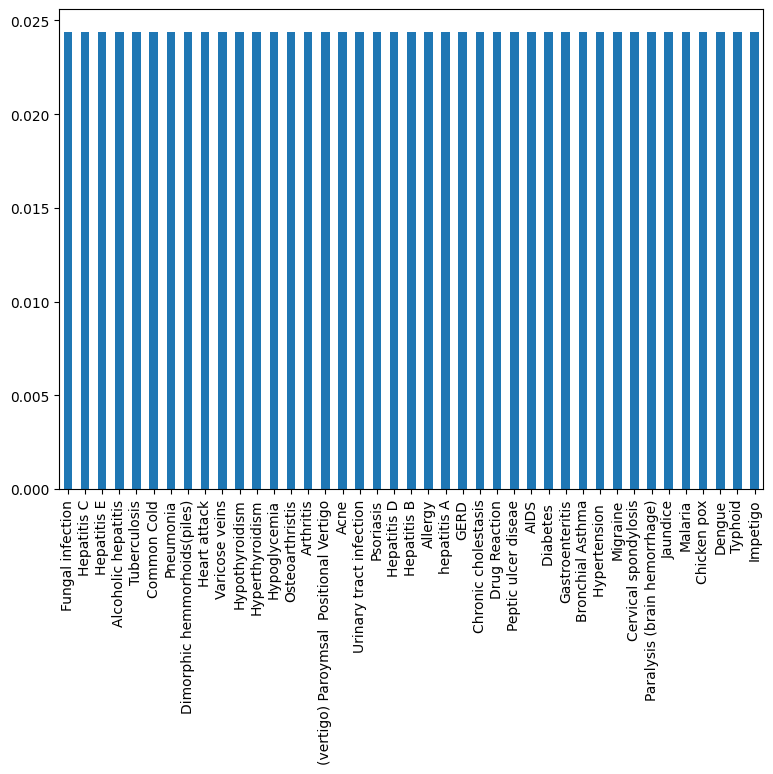

In [11]:
df_train['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

In [12]:
#checking the relationship between the variables by applying the correlation 
corr = df_train.drop(['prognosis'], axis=1).corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask, vmax=0.9, annot=True, cmap="YlGnBu")

<Axes: >

## Machine Learning Models

In [14]:
def add_cat_noise(dataframe, column, percentage = 50, visualize = False):
    copy = dataframe.copy()
    random_vals = np.random.choice(dataframe[column].unique(), copy.shape[0])
    proba = np.random.uniform(0, 100, copy.shape[0])
    copy[column] = dataframe[column].where(proba > percentage, random_vals)
    return copy

column = 'prognosis'

df_train = add_cat_noise(
    dataframe = df_train,
    column = column,
    percentage = 5,
    visualize = True
)

In [15]:
# Splitting the dataset

y=df_train['prognosis'] #target
x=df_train.drop(['prognosis'],axis=1) #symptoms
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [16]:
print ("Naive Bayes")
nb=MultinomialNB()
clf_nb=nb.fit(x_train,y_train)
print ("Acurracy: ", clf_nb.score(x_test,y_test))

Naive Bayes
Acurracy:  0.9538177339901478


In [17]:
print ("DecisionTree")
dt = DecisionTreeClassifier(min_samples_split=20)
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  0.9347290640394089


In [18]:
print ("Support Vector Machine")
svm = SVC(kernel='linear', C=1, gamma=0.1)
clf_svm=svm.fit(x_train,y_train)
print ("Acurracy: ", clf_svm.score(x_test,y_test))

Support Vector Machine
Acurracy:  0.9538177339901478


In [19]:
print ("Random Forest")
rf=RandomForestClassifier(n_estimators=50,n_jobs=5,random_state=33,criterion="entropy")
clf_rf=rf.fit(x_train,y_train)
print ("Acurracy: ", clf_rf.score(x_test,y_test))

Random Forest
Acurracy:  0.9538177339901478


In [20]:
df_test = pd.read_csv('Testing.csv')

In [21]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Allergy,NaN
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,GERD,NaN
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chronic cholestasis,NaN
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Drug Reaction,NaN


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 43.0+ KB


In [23]:
df_test = df_test.drop('Unnamed: 133', axis=1)

In [24]:
n=df_test['prognosis'] #target
m=df_test.drop(['prognosis'],axis=1) #symptoms
x1_train,x1_test,y1_train,y1_test=train_test_split(m,n,test_size=.33,random_state=42)

In [25]:
print("Actual score on test data")
print("Random Forest",clf_rf.score(m,n))
print("Decision Tree",clf_dt.score(m,n))
print("Naive Bayes",clf_nb.score(m,n))
print("Support Vector Machine",clf_svm.score(m,n))

Actual score on test data
Random Forest 0.926829268292683
Decision Tree 0.926829268292683
Naive Bayes 0.926829268292683
Support Vector Machine 0.926829268292683


### One-Hot Encoding

In [ ]:
one_hot_encoded_data = pd.get_dummies(df_train, columns=['prognosis'], dtype='int' )

In [ ]:
pd.set_option('display.max_columns', 175)
one_hot_encoded_data.head()

In [ ]:
one_hot_encoded_data.shape

In [ ]:
corr = one_hot_encoded_data.corr()
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [ ]:
# By using label encoding we are giving numbers for each categories of disease
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['prognosis'] = le.fit_transform(df_train['prognosis'])

In [ ]:
df_train.head()

In [ ]:
# Correlation between prognosis and Other variables
corr = df_train.corr()
plt.figure(figsize=(10, 35))
sns.heatmap(corr[['prognosis']], annot=True, cmap='coolwarm')
plt.title('Correlation between Prognosis and Other Variables')
plt.show()

### Merging the columns

In [ ]:
df_train['Encephalitis'] = (df_train['high_fever'] | df_train['mild_fever'] | df_train['headache'] | df_train['cough']  | df_train['sweating'])\
.astype(int)

In [35]:
df_train = df_train.drop(['high_fever', 'mild_fever', 'headache', 'cough', 'sweating'], axis=1)

In [36]:
other_columns = [col for col in df_train.columns if col not in ['Encephalitis', 'prognosis']]
column_order = other_columns + ['Encephalitis','prognosis']
df_train = df_train[column_order]

In [37]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,sunken_eyes,breathlessness,dehydration,indigestion,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Encephalitis,prognosis
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15


In [38]:
y=df_train['prognosis'] #target
x=df_train.drop(['prognosis'],axis=1) #symptoms
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)
x_test, y_test = sm.fit_resample(x_test, y_test)

In [40]:
y_train.value_counts()

9     91
11    91
26    91
35    91
29    91
4     91
30    91
19    91
40    91
0     91
3     91
33    91
38    91
28    91
13    91
7     91
25    91
2     91
14    91
22    91
8     91
20    91
17    91
18    91
32    91
21    91
23    91
39    91
37    91
6     91
36    91
34    91
27    91
5     91
24    91
31    91
16    91
12    91
15    91
10    91
1     91
Name: prognosis, dtype: int64

In [41]:
y_test.value_counts()

2     48
20    48
26    48
17    48
28    48
14    48
0     48
10    48
36    48
39    48
37    48
33    48
18    48
32    48
15    48
27    48
16    48
11    48
8     48
34    48
4     48
29    48
40    48
24    48
1     48
9     48
23    48
25    48
5     48
19    48
30    48
38    48
12    48
21    48
35    48
3     48
13    48
22    48
7     48
6     48
31    48
Name: prognosis, dtype: int64

In [42]:
print ("Naive Bayes")
nb=MultinomialNB()
clf_nb=nb.fit(x_train,y_train)
print ("Acurracy: ", clf_nb.score(x_test,y_test))

Naive Bayes
Acurracy:  0.9557926829268293


In [43]:
print ("DecisionTree")
dt = DecisionTreeClassifier(min_samples_split=20)
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  0.9435975609756098


In [44]:
print ("Support Vector Machine")
svm = SVC(kernel='linear', C=1, gamma=0.1)
clf_svm=svm.fit(x_train,y_train)
print ("Acurracy: ", clf_svm.score(x_test,y_test))

Support Vector Machine
Acurracy:  0.9547764227642277


In [45]:
print ("Random Forest")
rf=RandomForestClassifier(n_estimators=50,n_jobs=5,random_state=33,criterion="entropy")
clf_rf=rf.fit(x_train,y_train)
print ("Acurracy: ", clf_rf.score(x_test,y_test))

Random Forest
Acurracy:  0.9547764227642277


In [ ]:
!streamlit run voice_app.py

In [ ]:
pip install SMOTE